In [ ]:
1. Use fig.add_[h/v]line() and fig.add_[h/v]rect() to mark, respspectively, location (mean and median) and scale 
(range, interquartile range, and a range defined by two standard deviations away from the mean in both directions) of 
flipper_length_mm for each species onto plotly histograms of flipper_length_mm for each species in the penguins dataset.


In [8]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np

# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Loop over species to create separate histograms for each
species_list = penguins['species'].unique()

# Create an empty list to store figures
figs = []

for species in species_list:
    # Filter data for the current species
    species_data = penguins[penguins['species'] == species]['flipper_length_mm'].dropna()
    
    # Calculate location and scale statistics
    mean_flipper = species_data.mean()
    median_flipper = species_data.median()
    min_flipper = species_data.min()
    max_flipper = species_data.max()
    q1_flipper = species_data.quantile(0.25)
    q3_flipper = species_data.quantile(0.75)
    std_flipper = species_data.std()
    
    # Create the histogram
    fig = px.histogram(species_data, 
                       x=species_data, 
                       nbins=30, 
                       title=f'{species} - Flipper Length Distribution',
                       labels={'x': 'Flipper Length (mm)', 'y': 'Count'})
    
    # Add mean and median lines
    fig.add_vline(x=mean_flipper, line_dash="dash", line_color="blue", annotation_text="Mean", annotation_position="top right")
    fig.add_vline(x=median_flipper, line_dash="dot", line_color="green", annotation_text="Median", annotation_position="top left")
    
    # Add range (min to max) rectangle
    fig.add_vrect(x0=min_flipper, x1=max_flipper, fillcolor="purple", opacity=0.1, line_width=0, annotation_text="Range")
    
    # Add IQR (Q1 to Q3) rectangle
    fig.add_vrect(x0=q1_flipper, x1=q3_flipper, fillcolor="orange", opacity=0.2, line_width=0, annotation_text="IQR")
    
    # Add ±2 standard deviation rectangle
    fig.add_vrect(x0=mean_flipper - 2*std_flipper, 
                  x1=mean_flipper + 2*std_flipper, 
                  fillcolor="red", 
                  opacity=0.1, 
                  line_width=0, 
                  annotation_text="±2σ")
    
    # Append figure to list
    figs.append(fig)

# Show each figure for the species
for fig in figs:
    fig.show()


In [2]:
2. Transition your ChatBot session from the previous problem to repeat the previous problem, but this time using seaborn kernel
density estimation (KDE) plots to produce the desired figures organized in row of three plots



SyntaxError: invalid syntax (3947361729.py, line 1)

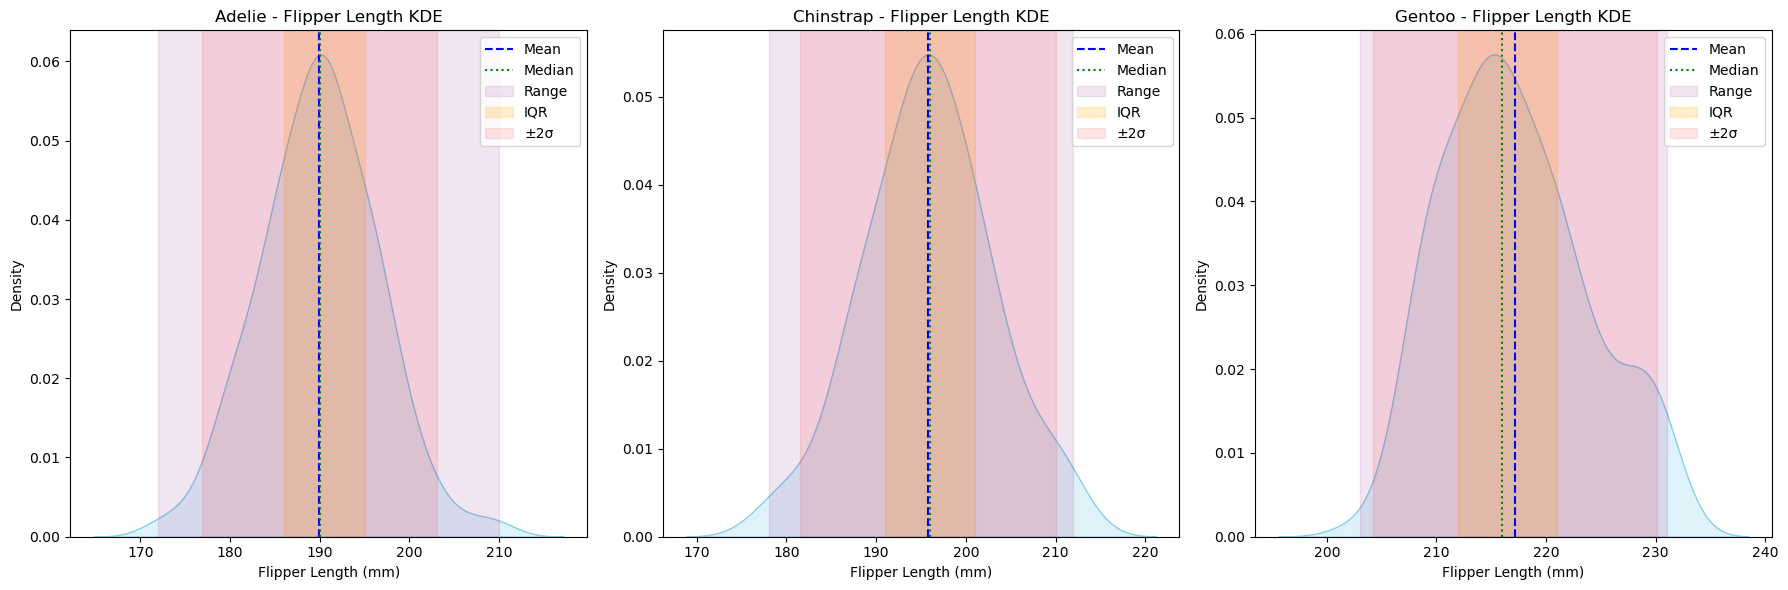

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns for 3 species

# List of species
species_list = penguins['species'].unique()

# Loop through each species to plot KDE
for i, species in enumerate(species_list):
    # Filter data for the current species
    species_data = penguins[penguins['species'] == species]['flipper_length_mm'].dropna()
    
    # Calculate location and scale statistics
    mean_flipper = species_data.mean()
    median_flipper = species_data.median()
    min_flipper = species_data.min()
    max_flipper = species_data.max()
    q1_flipper = species_data.quantile(0.25)
    q3_flipper = species_data.quantile(0.75)
    std_flipper = species_data.std()
    
    # Plot the KDE
    sns.kdeplot(species_data, ax=axes[i], fill=True, color='skyblue')
    axes[i].set_title(f'{species} - Flipper Length KDE')
    axes[i].set_xlabel('Flipper Length (mm)')
    axes[i].set_ylabel('Density')
    
    # Add vertical lines for mean and median
    axes[i].axvline(mean_flipper, color='blue', linestyle='--', label='Mean')
    axes[i].axvline(median_flipper, color='green', linestyle=':', label='Median')
    
    # Add shaded areas for range, IQR, and ±2σ
    axes[i].axvspan(min_flipper, max_flipper, alpha=0.1, color='purple', label='Range')
    axes[i].axvspan(q1_flipper, q3_flipper, alpha=0.2, color='orange', label='IQR')
    axes[i].axvspan(mean_flipper - 2*std_flipper, mean_flipper + 2*std_flipper, alpha=0.1, color='red', label='±2σ')
    
    # Add legend to each plot
    axes[i].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
3. Search online for some images of box plots, histograms, and kernel density estimators (perhaps for the same data set); 
describe to a ChatBot what you think the contrasting descriptions of these three "data distribution" visualization methods are;
and then see if the ChatBot agrees and what "pros and cons" list of these three "data distribution" visualization methods your 
ChatBot can come up with; finally, describe your preference for one or the other and your rationale for this preference

In [ ]:
I said: 
box plot's size is like a box and histograms looks like a rectangle and kernel density Estimation is like a shape of linear function,
am I right?

ChatGPT said:

Your descriptions are close, but they can be refined to better match the visual characteristics of each type of plot:

Box Plot:

The size and shape of a box plot are indeed like a rectangular "box," with additional lines (called "whiskers") extending 
from either end. The main "box" represents the interquartile range (IQR), while the whiskers indicate the range of the data, 
excluding outliers. The line inside the box represents the median value.
Histogram:

Histograms look like a series of adjacent rectangles (or bars) that represent the frequency of observations within specified bins. 
The width of each bar is determined by the bin width, and the height corresponds to the number of observations in that range.
Kernel Density Estimation (KDE):

The KDE plot is not a linear function but rather a smooth curve that represents a continuous estimate of the data's probability 
density. Its shape depends on the data and the choice of the kernel's bandwidth, which can cause the curve to be narrower or broader.
The curve can take various shapes depending on the underlying data distribution (e.g., bell-shaped, multimodal, etc.).

Summary:
Box Plot: Like a rectangular box with whiskers—good for summary statistics.
Histogram: Series of adjacent rectangles representing frequency distributions—good for observing frequency and shape.
KDE: Smooth, continuous curve—good for observing distribution shape without discrete bins.
Let me know if you'd like to dive deeper into any specific aspect or need further clarification!


I said：

pros and cons of these 3


ChatGPT said:
    
Box Plot

Pros:

Efficient Summary: Shows multiple key statistics (median, quartiles, range, and outliers) in a single compact visualization.
Great for Comparisons: Allows easy side-by-side comparison of distributions across different groups.
Robust to Outliers: Clearly indicates outliers and can handle skewed distributions without distorting the main summary.

Cons:

Lacks Distribution Shape: Does not reveal the underlying distribution shape, such as modality (bimodal or unimodal).
Over-simplification: By focusing on quartiles and medians, it can hide important details like gaps, peaks, or valleys in the data.
Limited to Numeric Data: Not suitable for non-numeric or categorical data.

Histogram

Pros:

Shows Distribution Shape: Useful for showing the frequency and shape of the data distribution, making it easy to identify skewness
and modality.
Visually Intuitive: Straightforward to create and interpret, making it a good starting point for understanding data distribution.
Can Handle Large Datasets: Works well with larger datasets to show the underlying patterns more clearly.

Cons:

Bin Sensitivity: The appearance of the histogram can be drastically affected by the choice of bin width, which might hide or 
overemphasize certain patterns​(Modeling Life).
Difficult Comparisons: Not ideal for comparing multiple distributions directly, as overlaying histograms can become cluttered.
Discrete Representation: Shows data in discrete bins, which might not be as smooth as the actual underlying distribution.

Kernel Density Estimation (KDE)

Pros:

Smooth Visualization: Provides a smooth estimate of the data distribution, which is not restricted by discrete bins.
Highlights Modality: Can clearly show peaks, valleys, and overall shape, making it ideal for identifying multimodal distributions.
Good for Comparisons: Multiple KDE curves can be overlaid in the same plot, allowing easy comparison of distributions.

Cons:

Bandwidth Sensitivity: The appearance of the KDE depends heavily on the choice of bandwidth; too small a bandwidth can overfit
noise, while too large a bandwidth can oversmooth the distribution​(Modeling Life).
Difficult with Small Data: Can be misleading or unstable with small sample sizes, as the smooth curve might not accurately represent
the data.
Less Intuitive: Compared to histograms, interpreting the area under a KDE curve as density might be less intuitive for some users.

Use Case Summary
Box Plot: Best for quick comparison and summary of multiple groups when the detailed shape of the distribution is not critical.
Histogram: Ideal for understanding frequency distribution and identifying skewness, modality, or general shape in a single group.
KDE: Suitable for a smooth visualization of the distribution shape, especially when overlaying multiple distributions.
These visualizations have their unique strengths and limitations, and the choice between them depends on the context and data
analysis needs.

My preference:

I prefer Box Plots because it is easier to see the maximum, medium and the outlier. That can make me know about is this data has a lot
of outliers that make the data inaccurate or it is a efficent data for me.

In [ ]:
4. Run the code below and look at the resulting figure of distrubutions and then answer the following questions
1)Which datasets have similar means and similar variances
2)Which datasets have similar means but quite different variances
3)Which datasets have similar variances but quite different means
4)Which datasets have quite different means and quite different variances

In [2]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [ ]:
1)Data set B and data set D have similar means and similar variances.

In [ ]:
2)Data set A and Data set C have similar means but quite different variances.

In [ ]:
3)Data set C and Data set D have similar variances but quite different means.

In [ ]:
4)Data set A and Data set D have quite different means and quite different variances.

In [ ]:
5. Start a new ChatBot session to explore the general relationship between the mean and median and "right" and "left" skewness
(and why this is); what the following code does and how it works; and then explain (in your own words) the relationship between 
the mean and median and "right" and "left" skewness and what causes this, using and extending the code to demonstrate your explanation
through a sequence of notebook cells.

In [ ]:
If the mean is greater than the median, then it is a right skewed. If the median is greater than the median, then it is a left skewed.

In [ ]:
6. Go find an interesting dataset and use summary statistics and visualizations to understand and demonstate some interesting aspects
of the data
1)Your approach should likely follow what was suggested for the Week 02 TUT Communication Activity from TUT
2)In the Week 03 TUT Communication Activity from TUT you will be put in groups and determine which group members dataset introduction
will be presented by the group

In [ ]:
I said:
Go find an interesting dataset and use summary statistics and visualizations to understand and demonstate some interesting aspects
of the data

ChatGPT said:

To explore and visualize some interesting aspects of a dataset, there are various options you could consider. For example:

New York City Squirrel Census: This dataset includes detailed observations of squirrels in Central Park, covering aspects like
behavior, coat color, and locations of sightings. You could analyze and visualize data to answer questions like which squirrel b
ehaviors are most common or which coat colors dominate in different areas of the park.

Fake Job Posts: This dataset from Kaggle contains real and fake job postings. It can be used to build machine learning models to 
predict the authenticity of job postings based on their content. This is ideal for classification tasks and can help in
understanding the characteristics of fraudulent job posts.

Pokémon Dataset: Covering all seven generations, this dataset provides attributes like base stats, abilities, and more for Pokémon. 
You can use this to identify trends, such as which Pokémon type tends to have the highest overall base stats or how the distribution
of stats has changed over generations.

Bigfoot Sightings: This dataset contains geographical and meteorological data on Bigfoot sightings. You could analyze this data to
find patterns, such as which regions have the most sightings or if sightings are correlated with particular weather conditions.

Million Song Dataset: If you are interested in music, this dataset includes audio features from a million songs, which you can use
to perform predictive analysis on what makes a song popular.

These datasets and many others can be found on platforms like Kaggle, data.world, and Data.gov, which host a variety of open datasets
for different analysis tasks. Using these datasets, you can calculate summary statistics and create visualizations 
(e.g., histograms, scatter plots) to explore relationships, distributions, and trends, depending on the nature of your analysis.

In [ ]:
7. Watch the classic Gapminder Video, then have a look at the plotly version and recreate the animation 
(perhaps after optionally exploring and changing the style, if you wish)

In [ ]:
I siad: Watch the classic Gapminder Video, then have a look at the plotly version and recreate the animation 
    (perhaps after optionally exploring and changing the style, if you wish)

ChatGPT said:

The classic Gapminder video by Hans Rosling, which visualizes the evolution of global health and wealth over time, has been
recreated using the Plotly library. The animated visualization shows how different countries' life expectancy and GDP per capita
have evolved, distinguishing regions through colors and scaling country points based on population.

To recreate this visualization in Python, you can use the Gapminder dataset, which is available on the Plotly website. You can
load the data into a Pandas DataFrame and then use Plotly Express to create an interactive bubble chart. The main parameters to set
are x='gdpPercap', y='lifeExp', size='pop', color='continent', and animation_frame='year'.

For more detailed instructions, refer to the GitHub repository that provides a complete notebook for this visualization here​(GitHub).
This resource demonstrates how to customize animations and set up sliders to control the year transitions, along with play/pause 
buttons for a smoother interactive experience.

Would you like to see a basic implementation of this animation using Plotly?

In [ ]:
8. Provide a second version of the figure from the previous problem where you edit the fig = px.scatter() function from the 
Gapminder code so that x is "percent change", y is "rank", size is "percent", and color="sex", animation_frame is "year", and 
animation_group and hover_name are "name". Then use size_max=50, range_x=[-0.005,0.005]) and remove the log_x=True and range_y
parameters

In [ ]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="", y="", animation_frame="", animation_group="",
                 size="", color="", hover_name="",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [ ]:
9. Have you reviewed the course wiki-textbook and interacted with a ChatBot 
(or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all
 the material in the tutorial and lecture that you didn't quite follow when you first saw it?

In [ ]:
Yeah, here are some contents I didn't understand when I first saw it. Such as what is kernel density estimators and I used 
chatbot to figure it out.